# Deconstruct - Single Event and Multiple Event

In [94]:
# Import lib
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter
import re


In [95]:
# Read the data function
# Reading the stats which was created in the Snakemake pipeline
def read_data(filename): 
    data = []
    with open(filename) as file: 
        for line in file.readlines(): 
            if not line.startswith("#"): 
                ls = line.split()
                data.append([ls[0], ls[1], ls[2], ls[3:]])
    return data

In [96]:
# Read all data - takes some time to run 
d = [1,2,3,4,5]
data = []
for x in d: 
    print(x)
    data.append(read_data("../results/deconstruct/stats/chr"+ str(x)+"_Chr"+str(x)+".stats"))

1
2
3
4
5


In [97]:
# Check the data
print(len(data[0][0][3]))
print(data[0][0][3])



28
['.', '0', '.', '.', '1', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '1', '.', '.', '.', '.', '0', '.', '.', '.', '.', '.', '1', '.']


# SV definition
- One "allele" is >= 15 bp
## Single event definition: 
    1. Smalltest allele is = 0.05*(maxLen) in Size
    2. If there are multiple "maximum" alleles, they must be highly similar (this inheritly includes being almost the same size). This is achieved by node based comparision of the traversalsa.
    3. All accession must be part of the bubble (count(accession) == max_accession)

## Multi event definition: 
- Everything what is not SE

# Read the graph

In [98]:
# Reading the graph with sequence and path
def readGFA(file):
    nodes = dict()
    paths = dict()
    with open(file) as file: 
        for x in file.readlines(): 
            if x.startswith("S"): 
                l = x.split()
                nodes[l[1]] = l[2]
            elif x.startswith("P"): 
                l = x.split()
                paths[l[1]] = [x for x in l[2].split(",")]
    return nodes, paths

In [99]:
nodes = []
paths = []
d = [1,2,3,4,5]

# Do this for all graphs
# Save nodes and paths in different lists
for x in d: 
    n1, p1 = readGFA("/ebio/abt6_projects9/1001g_plus_pan/data/graphs/ath_20240124/merged_graphs/chr"+ str(x) + ".fasta.gz.c325321.c2fac19.5c75112.smooth.final.gfa")
    nodes.append(n1)
    paths.append(p1)

# SVs

In [184]:
# Filter all files to get all bubbles that are bigger than 15 bp on 
# Change to 50 to check what is going on

all_svs = []
for x in range(5): 
    print(x)
    svs = []
    for v in data[x]: 
        lengths = [int(x) for x in v[2].split(",")]
        if max(lengths) >= 15: 
            svs.append(v)
    all_svs.append(svs)

0
1
2
3
4


In [185]:
all_svs[0]

[['>608>756',
  '>608>609>614>615>617>618>620>621>623>624>626>627>628>630>631>634>635>637>638>643>644>645>647>648>649>651>653>654>656>657>659>662>663>664>666>668>670>671>673>675>676>678>679>681>682>684>686>688>689>747>748>750>751>752>753>755>756,>608>609>614>615>616>618>620>621>622>624>625>627>628>630>631>634>635>637>638>643>644>645>647>648>649>651>653>654>656>658>659>661>663>664>666>668>670>671>673>675>676>678>679>681>682>683>684>685>686>688>689>690>692>693>694>697>700>703>704>705>706>709>713>714>716>717>719>720>722>723>725>726>727>729>730>731>732>734>736>737>738>739>741>742>744>745>746>747>748>750>751>752>753>755>756,>608>609>614>615>617>618>620>621>623>624>626>627>628>630>631>634>635>637>638>643>644>645>646>648>649>651>653>654>656>658>659>662>663>664>666>668>670>671>673>675>676>678>679>680>682>683>684>685>686>688>689>690>691>693>694>697>700>703>704>705>706>709>712>729>730>731>732>733>734>736>737>738>739>741>742>744>745>746>747>748>750>751>752>753>755>756,>608>609>613>615>617>618>620

In [191]:
len([x for x in all_svs[0] if int(max(x[2].split(","))) > 50])

17820

In [192]:
all_svs[1]

[['>5681>5688',
  '<5688<5687<5686<5683<5681,<5688<5687<5684<5682<5681,<5688<5685<5684<5682<5681',
  '37,37,37',
  ['2',
   '.',
   '.',
   '.',
   '.',
   '.',
   '.',
   '.',
   '.',
   '.',
   '.',
   '.',
   '.',
   '.',
   '.',
   '0',
   '.',
   '0',
   '.',
   '.',
   '.',
   '1',
   '0',
   '.',
   '.',
   '.',
   '.',
   '0']],
 ['>5585>5602',
  '<5602<5600<5598<5597<5596<5595<5593<5592<5590<5587<5585,<5602<5600<5599<5597<5588<5587<5585,<5602<5589<5588<5586<5585,<5602<5601<5600<5598<5597<5596<5595<5593<5592<5590<5587<5585,<5602<5600<5598<5597<5596<5594<5593<5591<5590<5587<5585',
  '215,215,215,216,215',
  ['4',
   '.',
   '.',
   '.',
   '.',
   '.',
   '.',
   '.',
   '.',
   '.',
   '.',
   '.',
   '.',
   '.',
   '.',
   '0',
   '.',
   '3',
   '.',
   '.',
   '.',
   '2',
   '0',
   '.',
   '.',
   '.',
   '.',
   '1']],
 ['>8856>8933',
  '>8856>8859>8860>8863>8864>8867>8868>8870>8872>8874>8875>8876>8877>8878>8879>8881>8883>8884>8885>8887>8888>8890>8891>8929>8931>8933,>885

In [193]:
# Get the length if a specific node list
def getLen(d, nodes): 
    ll = 0
    for x in d:
        ll += len(nodes[x])
    return ll

In [194]:
# Check for SingleEvent SVs

def detect_SE_SVs(allsvs, nodes): 
    
    """
    Result is [number of big alleles, size of the allele]
    """
    result = []
    
    
    for i, svs in enumerate(allsvs): 
        print("Chromosome ", i+1)
        indels = []
        indels2 = []
        
        c = 0 
        cc = 0
        
        # take the right graph
        chr_nodes = nodes[i]
        
        
        for v in svs: 
            # Check if all accessions have this bubble
            if len(v[3]) == len([x for x in v[3] if x.isnumeric()]):
                
                # This is the length
                lengths = [int(x) for x in v[2].split(",")]
                # Get max length
                mm = max(lengths)
                
                # Check the first thing. Is the traversal small (smaller than 0.05*max_size, or big?)
                # big = the all traversals, vv = index 
                big = []
                vv = []
                small = False
                for i, x in enumerate(v[1].split(",")): 
                    if lengths[i] > 0.05*mm:
                        big.append(x)
                        vv.append(str(i))
                    else: 
                        small = True
                if small: 
                    # take first traversal split by first non-numeric letter
                    f1 = re.split(r'\D+',big[0][1:])
                    
                    # This the intersection of all nodes in this bubble
                    # Remove first and last entry
                    intersection = set(f1[1:-1])
                    
                    # Add the rest (other traversals to the uni)
                    for x in big[1:]: 
                        f1 = re.split(r'\D+',x[1:])
                        intersection = intersection.intersection(set(f1[1:-1]))

                    # Check the size of traversals in the set // no direct "alignment"
                    if len(intersection) != 0: 
                        # Combine all nodes in this set 
                        o = 1
                        for x in big:
                            f1 = re.split(r'\D+',x[1:])
                            f1_set = set(f1[1:-1])
                            
                            # How many nodes are not represented in the intersection
                            f1_diff = f1_set-intersection
                            if len(f1_diff) == 0: 
                                o = 1
                            else: 
                                o = min(o, getLen(f1_diff, chr_nodes)/getLen(intersection, chr_nodes))

                        # If all are mostly the same, all good --> fine
                        # Else: there are different traversals
                        if o > 0.9: 
                            c += 1
                            indels.append(v)
                            df = 0
                            ## How many nodes have the "big" allele 
                            for x in v[3]: 
                                if x in vv:
                                    df += 1
                            indels2.append([df, mm])
            if cc % 10000 == 0:
                print(cc)
                print(c)
            cc += 1

        result.append(indels2)
        print("t")

    return result
            

In [195]:
se_sv = detect_SE_SVs(all_svs, nodes)

Chromosome  1
0
0
10000
2567
20000
3520
30000
5417
t
Chromosome  2
0
0
10000
748
20000
3282
t
Chromosome  3
0
0
10000
2414
20000
2937
30000
4312
t
Chromosome  4
0
0
10000
907
20000
3137
t
Chromosome  5
0
0
10000
2316
20000
3339
30000
5374
t


In [196]:
print([len(x) for x in se_sv])

[6061, 3845, 4312, 3595, 5374]


In [197]:
# Check data
se_sv[0]

[[27, 24],
 [11, 33],
 [27, 22],
 [27, 30],
 [1, 3398],
 [2, 23],
 [22, 64],
 [27, 32],
 [1, 19],
 [1, 17],
 [1, 35],
 [22, 16],
 [1, 276],
 [9, 24],
 [1, 3410],
 [27, 19],
 [26, 22],
 [16, 30],
 [17, 106],
 [8, 17],
 [8, 21],
 [4, 17],
 [17, 20],
 [22, 42],
 [23, 35],
 [1, 395],
 [27, 18],
 [1, 15],
 [21, 33],
 [26, 15],
 [4, 23],
 [27, 15],
 [21, 24],
 [12, 15],
 [16, 60],
 [1, 28],
 [2, 55],
 [2, 15],
 [14, 22],
 [11, 26],
 [13, 18],
 [1, 22],
 [27, 15],
 [1, 3681],
 [2, 15],
 [1, 5630],
 [1, 19],
 [19, 20],
 [15, 15],
 [16, 22],
 [1, 28],
 [27, 16],
 [27, 18],
 [1, 28],
 [1, 30],
 [27, 20],
 [3, 15],
 [27, 27],
 [2, 33],
 [14, 41],
 [2, 29],
 [26, 24],
 [1, 32],
 [6, 23],
 [24, 31],
 [27, 53],
 [22, 22],
 [24, 17],
 [21, 21],
 [3, 298],
 [10, 15],
 [27, 21],
 [1, 768],
 [1, 2084],
 [27, 21],
 [2, 50],
 [25, 71],
 [5, 47],
 [27, 17],
 [25, 26],
 [27, 32],
 [1, 7715],
 [26, 15],
 [7, 88],
 [27, 15],
 [24, 51],
 [27, 18],
 [1, 33],
 [27, 18],
 [15, 91],
 [27, 15],
 [24, 17],
 [27, 39]

In [198]:
# Size check 


In [207]:
# Count for every number
result = []
for x in range(1,28): 
    result_help = []
    for x1 in se_sv: 
        for y in x1:
            if y[0] == x: 
                result_help.append(y[1])
    result.append(result_help)
result[0]

[3398,
 19,
 17,
 35,
 276,
 3410,
 395,
 15,
 28,
 22,
 3681,
 5630,
 19,
 28,
 28,
 30,
 32,
 768,
 2084,
 7715,
 33,
 16,
 212,
 712,
 33,
 15,
 5269,
 32,
 24,
 770,
 3101,
 23,
 16,
 4749,
 41,
 2092,
 37,
 1848,
 169,
 41,
 4742,
 5908,
 30,
 3396,
 21,
 356,
 30,
 70,
 775,
 792,
 1249,
 37,
 33,
 1921,
 22,
 28,
 28,
 5010,
 73,
 1410,
 26,
 445,
 25,
 28,
 15,
 37,
 61,
 4966,
 25,
 409,
 4926,
 20,
 42,
 4226,
 28,
 37,
 2250,
 21,
 31,
 22,
 26,
 203,
 36,
 299,
 104,
 21,
 4324,
 588,
 19,
 15,
 19,
 26,
 308,
 13126,
 22,
 31,
 15,
 1881,
 55,
 52,
 1110,
 26,
 2241,
 18,
 15,
 188,
 51,
 1132,
 15,
 21,
 6253,
 31,
 19,
 21,
 39,
 3892,
 36,
 30,
 4882,
 40,
 52,
 27,
 957,
 541,
 5258,
 263,
 8519,
 42,
 16,
 4639,
 19,
 56,
 28,
 4966,
 19,
 20,
 22,
 26,
 24,
 15,
 56,
 31,
 1190,
 4768,
 88,
 27,
 906,
 1043,
 232,
 1490,
 580,
 34,
 15,
 29,
 24,
 1078,
 25,
 5120,
 993,
 6438,
 916,
 32,
 36,
 2411,
 252,
 31,
 24,
 18,
 1293,
 15,
 24,
 32,
 4764,
 28,
 52,
 2770,


In [208]:
# Make a histogram
helper = []
for x in result: 
    helper.append(np.histogram(x, bins = [50,500, 1000, 5000, 100000000]))
helper2 = np.array([x[0] for x in helper])


In [209]:
df = pd.DataFrame(helper2)
df2 = df.div(df.sum(axis=1), axis=0)
df2

0         1         2         3
0   0.267313  0.101385  0.419114  0.212188
1   0.529740  0.083643  0.275093  0.111524
2   0.728814  0.084746  0.112994  0.073446
3   0.744444  0.055556  0.133333  0.066667
4   0.790123  0.037037  0.123457  0.049383
5   0.826087  0.021739  0.065217  0.086957
6   0.720000  0.120000  0.080000  0.080000
7   0.605263  0.131579  0.052632  0.210526
8   0.878788  0.000000  0.060606  0.060606
9   0.862069  0.068966  0.000000  0.068966
10  0.615385  0.230769  0.038462  0.115385
11  0.760000  0.040000  0.040000  0.160000
12  0.800000  0.000000  0.040000  0.160000
13  0.812500  0.000000  0.187500  0.000000
14  0.941176  0.000000  0.058824  0.000000
15  0.783784  0.027027  0.081081  0.108108
16  0.826087  0.043478  0.043478  0.086957
17  0.761905  0.000000  0.142857  0.095238
18  0.848485  0.060606  0.030303  0.060606
19  0.846154  0.000000  0.076923  0.076923
20  0.840000  0.080000  0.040000  0.040000
21  0.653846  0.115385  0.115385  0.115385
22  0.641026  0.000000  0.205128  0.153846
23  0.868852  0.016393  0.065574  0.049180
24  0.727273  0.030303  0.106061  0.136364
25  0.737179  0.032051  0.096154  0.134615
26  0.766204  0.037037  0.081019  0.115741

In [210]:
#df.columns = ["15-50", "50-100", "100-200", "200-500", "500-1000", "1000-2000", "2000-5000", "5000-inf"]
#df2.columns = ["15-50", "50-100", "100-200", "200-500", "500-1000", "1000-2000", "2000-5000", "5000-inf"]
df.columns = ["15-50", "50-100", "100-200", "t"]
df2.columns = ["15-50", "50-100", "100-200", "t"]
df2.head()

15-50    50-100   100-200         t
0  0.267313  0.101385  0.419114  0.212188
1  0.529740  0.083643  0.275093  0.111524
2  0.728814  0.084746  0.112994  0.073446
3  0.744444  0.055556  0.133333  0.066667
4  0.790123  0.037037  0.123457  0.049383

In [211]:
df

15-50  50-100  100-200    t
0     965     366     1513  766
1     285      45      148   60
2     129      15       20   13
3      67       5       12    6
4      64       3       10    4
5      38       1        3    4
6      36       6        4    4
7      23       5        2    8
8      29       0        2    2
9      25       2        0    2
10     16       6        1    3
11     19       1        1    4
12     20       0        1    4
13     13       0        3    0
14     16       0        1    0
15     29       1        3    4
16     19       1        1    2
17     16       0        3    2
18     28       2        1    2
19     22       0        2    2
20     21       2        1    1
21     17       3        3    3
22     25       0        8    6
23     53       1        4    3
24     48       2        7    9
25    115       5       15   21
26    331      16       35   50

<Figure size 2000x1000 with 0 Axes>

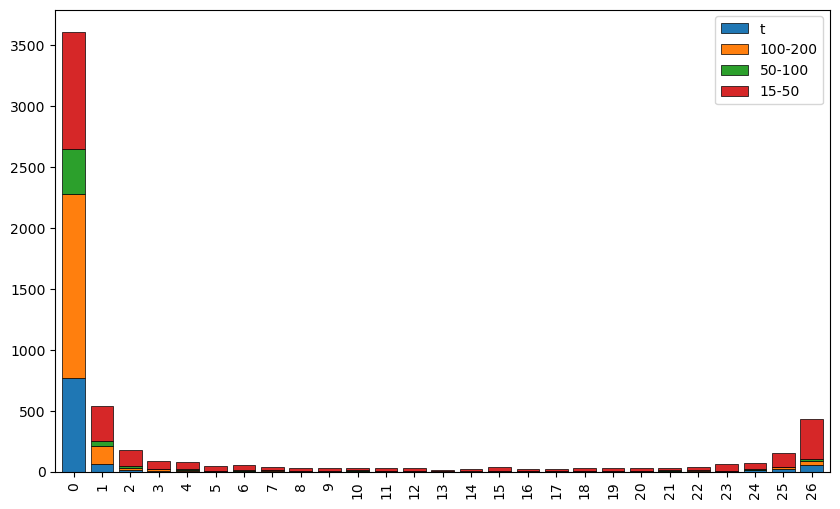

In [212]:
plt.rcParams['font.size'] = 10

plt.figure(figsize = (20,10))
df[df.columns[::-1]].plot.bar(stacked = True, width = 0.8, edgecolor = "black", linewidth = 0.5, figsize = (10,6), legend = True)
plt.savefig("plots/sizes_absolute.png", dpi = 1000)
plt.show()

In [213]:
df2

15-50    50-100   100-200         t
0   0.267313  0.101385  0.419114  0.212188
1   0.529740  0.083643  0.275093  0.111524
2   0.728814  0.084746  0.112994  0.073446
3   0.744444  0.055556  0.133333  0.066667
4   0.790123  0.037037  0.123457  0.049383
5   0.826087  0.021739  0.065217  0.086957
6   0.720000  0.120000  0.080000  0.080000
7   0.605263  0.131579  0.052632  0.210526
8   0.878788  0.000000  0.060606  0.060606
9   0.862069  0.068966  0.000000  0.068966
10  0.615385  0.230769  0.038462  0.115385
11  0.760000  0.040000  0.040000  0.160000
12  0.800000  0.000000  0.040000  0.160000
13  0.812500  0.000000  0.187500  0.000000
14  0.941176  0.000000  0.058824  0.000000
15  0.783784  0.027027  0.081081  0.108108
16  0.826087  0.043478  0.043478  0.086957
17  0.761905  0.000000  0.142857  0.095238
18  0.848485  0.060606  0.030303  0.060606
19  0.846154  0.000000  0.076923  0.076923
20  0.840000  0.080000  0.040000  0.040000
21  0.653846  0.115385  0.115385  0.115385
22  0.641026  0.000000  0.205128  0.153846
23  0.868852  0.016393  0.065574  0.049180
24  0.727273  0.030303  0.106061  0.136364
25  0.737179  0.032051  0.096154  0.134615
26  0.766204  0.037037  0.081019  0.115741

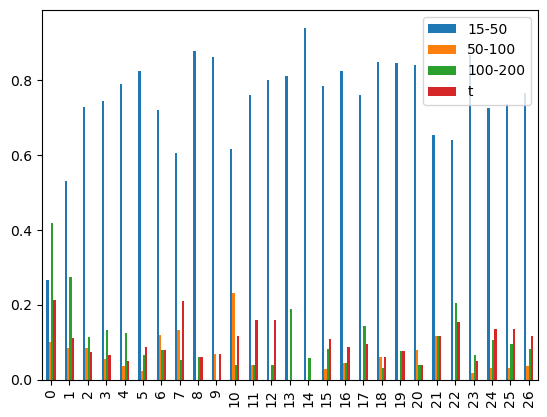

In [214]:
df2.plot.bar()
plt.show()

<Figure size 2000x1000 with 0 Axes>

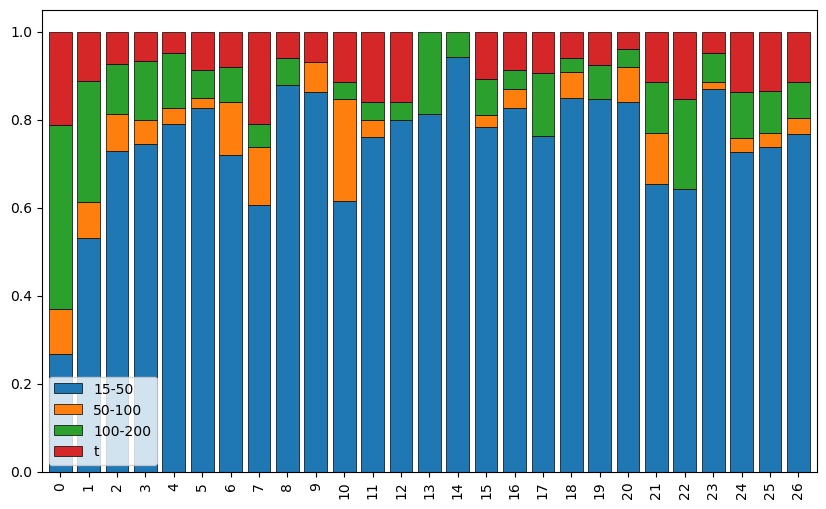

In [215]:
plt.figure(figsize = (20,10))
df2.plot.bar(stacked = True, width = 0.8, edgecolor = "black", linewidth = 0.5, figsize = (10,6), legend = False)
plt.legend()
plt.show()
#plt.savefig("sizes_rel.png", dpi = 1000)

In [216]:
df.index = list(range(1,len(df.index)+1))
df.head()

15-50  50-100  100-200    t
1    965     366     1513  766
2    285      45      148   60
3    129      15       20   13
4     67       5       12    6
5     64       3       10    4

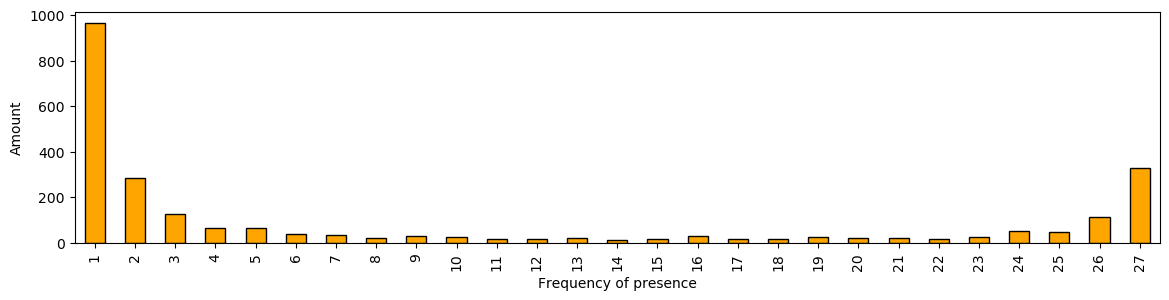

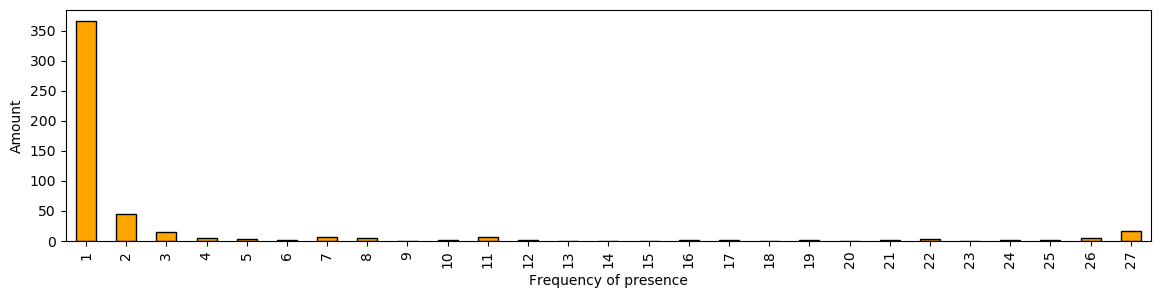

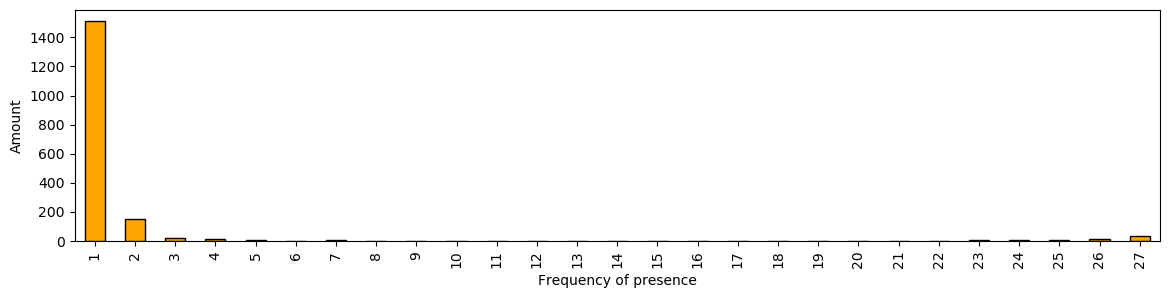

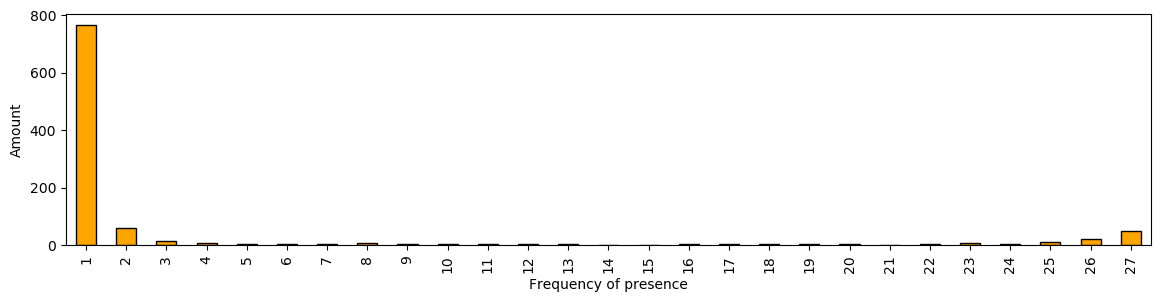

In [217]:
for x in df.columns:
    
    df[x].plot.bar(figsize = (14,3), edgecolor = "black", color = "orange")
    plt.xlabel("Frequency of presence")
    plt.ylabel("Amount")
    plt.savefig("plots/df" + str(x) + ".png", dpi = 1000)

    plt.show()

In [218]:
labels = ['SE', 'ME']

In [219]:
se = sum([len(x) for x in f])

In [220]:
me = sum([len(x)-len(y) for x,y in zip(all_svs,f)])

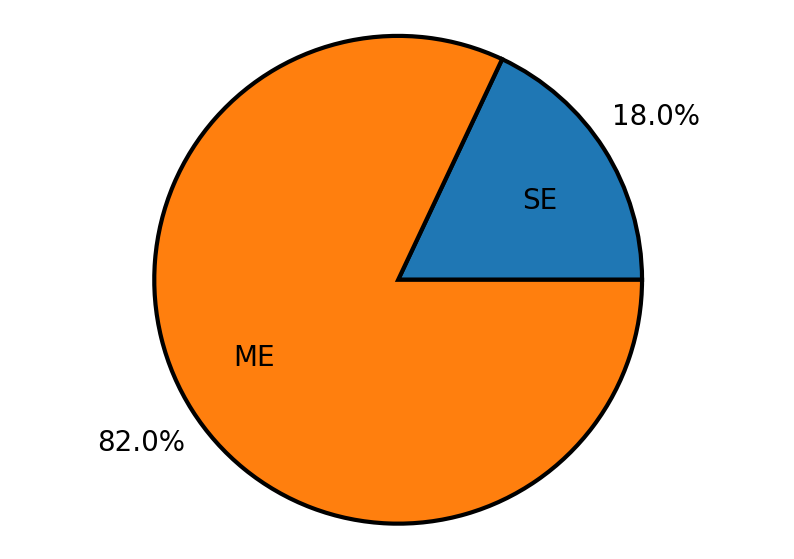

In [221]:
plt.figure(figsize=(10,7))
plt.rcParams['font.size'] = 20
plt.pie([se, me], autopct='%1.1f%%', wedgeprops={"edgecolor":"k",'linewidth': 3, 'antialiased': True},pctdistance=1.25, labeldistance=.6, labels = labels)
plt.axis('equal')
plt.savefig("plots/pieplot_seme.png", dpi = 1000)
plt.savefig("plots/pieplot_seme.pdf")
plt.show()